## Test and compare between networkx and rustworkx

- Generate a dumb network
- compare the shortest searching time between two algorithms


In [1]:
import rustworkx as rx
import networkx as nx
import pandas as pd

In [2]:
import matplotlib as mpl

In [3]:
graph = rx.PyGraph()

# Each time add node is called, it returns a new node index
a = graph.add_node("A")
b = graph.add_node("B")
c = graph.add_node("C")
d = graph.add_node("Ds")
print(a, b, c)

# add_edges_from takes tuples of node indices and weights,
# and returns edge indices
graph.add_edges_from(
    [(a, b, (1.4, 1.4)),
     (a, c, (5.0, 5.0)),
     (b, c, (2.5, 1000))]
)

# Returns the path A -> B -> C
ret1 = rx.dijkstra_shortest_paths(
    graph, 
    source=a, # target=c,
    weight_fn=lambda x: x[0]
)

print(ret1)

ret2 = rx.dijkstra_shortest_path_lengths(
    graph, 
    node=a, # target=c,
    edge_cost_fn=lambda x: x[0]
)

print(ret2)

0 1 2
PathMapping{2: [0, 1, 2], 1: [0, 1]}
PathLengthMapping{1: 1.4, 2: 3.9}


In [12]:
print(list(ret1.keys()))

[2, 1]


In [6]:
{'a': [1,2,3], 'b':[45,6,3]}.keys()

dict_keys(['a', 'b'])

In [4]:
import matplotlib.pyplot as plt

In [90]:
df = pd.DataFrame.from_dict(ret2, orient='index')
df = df.reset_index()
df.columns = ["stop_id", "acc_time"]
df

,stop_id,acc_time
0,1,1.4
1,2,3.9


In [81]:
ret[2]

In [82]:
for e in graph.edges():
    if e[1] > 100:
        print(e)

(2.5, 1000)


In [20]:
graph = rx.PyGraph()

# Each time add node is called, it returns a new node index
a = graph.add_node("A")
b = graph.add_node("B")
c = graph.add_node("C")

# add_edges_from takes tuples of node indices and weights,
# and returns edge indices
graph.add_edges_from(
    [(a, b, (1.4, 1.4)),
     (a, c, (5.0, 5.0)),
     (b, c, (2.5, 1000))]
)

# Returns the path A -> B -> C
ret = rx.dijkstra_shortest_paths(graph, a, c, weight_fn=lambda x: x[1])
print(ret)

PathMapping{2: [0, 2]}


In [21]:
graph.edges()

[(1.4, 1.4), (5.0, 5.0), (2.5, 1000)]

In [17]:
graph.add_edge(a, 55555, 1.8)

IndexError: One of the endpoints of the edge does not exist in graph

In [18]:
new_nodes = [
    ("stop_10", {}),
    ("stop_20", {}),
    ("stop_30", {})
]

new_node_ids = graph.add_nodes_from(new_nodes)
print(new_node_ids)

NodeIndices[3, 4, 5]


In [19]:
graph[4]

('stop_20', {})

In [12]:
node_indices = graph.node_indices()
edge_indices = graph.edge_indices()
print(node_indices)
print(edge_indices)

NodeIndices[0, 1, 2]
EdgeIndices[0, 1, 2]


In [13]:
# get node attributes...
first_index_data = graph[node_indices[0]]
print(first_index_data)

A


In [15]:
# a helper method to get edge attributes...
print(graph.edge_index_map())

EdgeIndexMap{0: (0, 1, 1.5), 1: (0, 2, 5.0), 2: (1, 2, 2.5)}


In [17]:
# easy ways to get all payloads...
print("Node data payloads")
print(graph.nodes())
print("Edge data payloads")
print(graph.edges())

Node data payloads
['A', 'B', 'C']
Edge data payloads
[1.5, 5.0, 2.5]


In [19]:
# (1) add multiple nodes given a list...
# (2) removing elements from graph...
graph = rx.PyGraph()
graph.add_nodes_from(list(range(5)))
print(graph.node_indices())
graph.add_nodes_from(list(range(2)))
print(graph.node_indices())
graph.remove_node(2)
print(graph.node_indices())

NodeIndices[0, 1, 2, 3, 4]
NodeIndices[0, 1, 2, 3, 4, 5, 6]
NodeIndices[0, 1, 3, 4, 5, 6]


In [20]:
# modifying elements
last_index = graph.node_indices()[-1]
graph[last_index] = "New Payload"
print(graph[last_index])

New Payload


In [22]:
# use object as node payload
class GraphNode:
    def __init__(self, value):
        self.value = value
        self.index = None
    
    def __str__(self):
        return f"GraphNode: {self.value} @ index: {self.index}"

graph = rx.PyGraph()
index = graph.add_node(GraphNode("A"))
graph[index].index = index

In [14]:
G = rx.PyGraph()
indices = G.add_nodes_from(range(5))
G.add_edge(1, 2, None)
G.add_edge(1, 4, None)
G.add_edge(2, 3, None)
G.add_edge(2, 4, None)

# access edges from nodes...
print(G.incident_edges(2))
# node neighbors...
print(G.neighbors(2))

EdgeIndices[3, 2, 0]
NodeIndices[3, 1, 4]


In [ ]:
G.incident_edge_index_map

In [66]:
q1 = G.incident_edges(2)
print(q1)
print(q1[0])
print()

q2 = G.incident_edges(1)
print(q2)
print(q2[0])
print()

print(G.incident_edges(3))
print()

# print(G.neighbors(2))
# print(G.neighbors(2)[0])
# print(G.neighbors(2)[1])

EdgeIndices[3, 2, 0]
3

EdgeIndices[1, 0]
1

EdgeIndices[2]



In [71]:
print(set(q1).intersection(set(q2)))

{0}


In [52]:
ret = G.incident_edges(1)
print(ret)
print(ret[0])

EdgeIndices[0]
0


In [50]:
print(G.incident_edges(3))

EdgeIndices[]


In [24]:
print(G.neighbors(2))

NodeIndices[3, 1, 4]


In [19]:
edge_map = G.incident_edge_index_map(2)
print(edge_map)

for e in edge_map:
    print(e, edge_map[e])

EdgeIndexMap{3: (2, 4, None), 2: (2, 3, None), 0: (2, 1, None)}
3 (2, 4, None)
2 (2, 3, None)
0 (2, 1, None)


In [22]:
list(edge_map.values())

[(2, 4, None), (2, 3, None), (2, 1, None)]

In [31]:
the_edge = G.edge_indices_from_endpoints(2, 3)
print(the_edge)
G.edge_index_map(the_edge[0])

EdgeIndices[2]


TypeError: PyGraph.edge_index_map() takes no arguments (1 given)

In [59]:
edge_map

In [61]:
G.edges()[0]

[None]

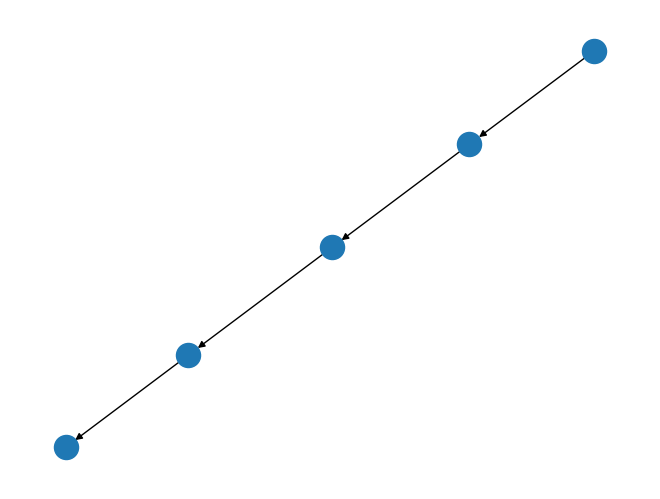

In [39]:
# visualization...
from rustworkx.visualization import mpl_draw

path_graph = rx.generators.directed_path_graph(5)
mpl_draw(path_graph)

In [74]:
graph = rx.PyGraph(multigraph=False)
graph.add_nodes_from(range(3))
graph.add_edges_from([(0, 1, 'A'), (0, 1, 'B'), (1, 2, 'C')])
mpl_draw(graph, with_labels=True, edge_labels=str)

NameError: name 'mpl_draw' is not defined

In [22]:
import rustworkx as rx
from typing import Dict, List, Tuple
import heapq

def custom_dijkstra(graph: rx.PyDiGraph, source: int, target: int, cutoff: float) -> Tuple[Dict[int, float], Dict[int, int]]:
    distances = {source: 0}
    predecessors = {}
    pq = [(0, source)]

    while pq:
        current_distance, current_vertex = heapq.heappop(pq)

        if current_vertex == target:
            return distances, predecessors

        if current_distance > cutoff:
            break

        if current_distance > distances.get(current_vertex, float('inf')):
            continue

        for neighbor in graph.neighbors(current_vertex):
            weight = graph.get_edge_data(current_vertex, neighbor)
            distance = current_distance + weight

            if distance < distances.get(neighbor, float('inf')):
                distances[neighbor] = distance
                predecessors[neighbor] = current_vertex
                heapq.heappush(pq, (distance, neighbor))

    return distances, predecessors

In [27]:
# Example usage
graph = rx.PyDiGraph()
graph.add_nodes_from(range(5))
graph.add_edges_from([(0, 1, 4), (0, 2, 2), (1, 3, 3), (2, 3, 1), (3, 4, 5)])

source = 0
target = 4
cutoff = 5

distances, predecessors = custom_dijkstra(graph, source, target, cutoff)
print(f"Distances: {distances}")
print(f"Predecessors: {predecessors}")

Distances: {0: 0, 2: 2, 1: 4, 3: 3, 4: 8}
Predecessors: {2: 0, 1: 0, 3: 2, 4: 3}
